# **Import Library and Dataset**



In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import Calculations
from math import sqrt

# Import Outlier
from scipy import stats

# Import Split Train & Test
from sklearn.model_selection import train_test_split

# Import Standardization
from sklearn.preprocessing import StandardScaler

# Import Machine Learning
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Import Metrik
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Import Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Import Running Time
import time

# Import Learning Curve
from sklearn.model_selection import learning_curve

# Import Validation Curve
from sklearn.model_selection import validation_curve

In [2]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/ROP Prediction/Field X.xlsx')

Mounted at /content/drive


# **Exploratory Data Analysis (EDA)**

## **Dataset Description**

---

In [3]:
# Display 5 Initial Dataset
df.head(5)

,DATE/TIME,MDEPTH (m),TVD (m),SECTION,ROP (m/hrs),ROP Instant (min/m),WOB (Klbs),HKLD (Klbs),RPM,RPMM,Total RPM,MFI (GPM),SPP (Psi),TORQ (kft-lb),MWI (ppg),BITH,PUMP HRS,Bit Size
0,2021-01-06 23:56:40,40.0,40.0,26.0,23.21,24.15,2.6,49.93,28.0,0.0,28.0,330.0,150.0,1.0,8.0,6.4,0.4,26.0
1,2021-01-06 23:56:42,40.1,40.1,26.0,25.23,25.98,2.6,49.93,28.0,0.0,28.0,349.0,150.0,1.0,8.0,6.4,0.4,26.0
2,2021-01-06 23:56:47,40.2,40.2,26.0,16.21,15.23,2.6,49.52,28.0,0.0,28.0,331.0,150.0,1.0,8.0,6.4,0.4,26.0
3,2021-01-06 23:56:54,40.3,40.3,26.0,17.25,18.52,2.6,49.50,28.0,0.0,28.0,338.0,150.0,1.0,8.7,6.4,0.5,26.0
4,2021-01-06 23:57:01,40.4,40.4,26.0,12.23,13.25,2.6,49.11,28.0,0.0,28.0,328.0,150.0,1.0,8.7,6.4,0.5,26.0


In [4]:
# Display Data Type & Non-null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25141 entries, 0 to 25140
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE/TIME            25141 non-null  datetime64[ns]
 1   MDEPTH (m)           25141 non-null  float64       
 2   TVD (m)              25141 non-null  float64       
 3   SECTION              25141 non-null  float64       
 4   ROP (m/hrs)          25141 non-null  float64       
 5   ROP Instant (min/m)  25141 non-null  float64       
 6   WOB (Klbs)           25141 non-null  float64       
 7   HKLD (Klbs)          25141 non-null  float64       
 8   RPM                  25141 non-null  float64       
 9   RPMM                 25141 non-null  float64       
 10  Total RPM            25141 non-null  float64       
 11  MFI (GPM)            25141 non-null  float64       
 12  SPP (Psi)            25141 non-null  float64       
 13  TORQ (kft-lb)        25141 non-

In [5]:
# Number of Blank Rows
df.isnull().sum()

DATE/TIME              0
MDEPTH (m)             0
TVD (m)                0
SECTION                0
ROP (m/hrs)            0
ROP Instant (min/m)    0
WOB (Klbs)             0
HKLD (Klbs)            0
RPM                    0
RPMM                   0
Total RPM              0
MFI (GPM)              0
SPP (Psi)              0
TORQ (kft-lb)          0
MWI (ppg)              0
BITH                   0
PUMP HRS               0
Bit Size               0
dtype: int64

In [6]:
# Remove Non-float/Non-Interger Dataset
df = df.drop(columns=['DATE/TIME'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25141 entries, 0 to 25140
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MDEPTH (m)           25141 non-null  float64
 1   TVD (m)              25141 non-null  float64
 2   SECTION              25141 non-null  float64
 3   ROP (m/hrs)          25141 non-null  float64
 4   ROP Instant (min/m)  25141 non-null  float64
 5   WOB (Klbs)           25141 non-null  float64
 6   HKLD (Klbs)          25141 non-null  float64
 7   RPM                  25141 non-null  float64
 8   RPMM                 25141 non-null  float64
 9   Total RPM            25141 non-null  float64
 10  MFI (GPM)            25141 non-null  float64
 11  SPP (Psi)            25141 non-null  float64
 12  TORQ (kft-lb)        25141 non-null  float64
 13  MWI (ppg)            25141 non-null  float64
 14  BITH                 25141 non-null  float64
 15  PUMP HRS             25141 non-null 

In [7]:
# Dataset Description
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDEPTH (m),25141.0,1310.752766,729.235673,40.00,682.600,1311.20,1939.800,2577.00
TVD (m),25141.0,1168.712999,611.590902,40.00,668.894,1184.25,1679.500,2241.30
SECTION,25141.0,16.107732,4.601923,12.25,12.250,17.50,17.500,26.00
ROP (m/hrs),25141.0,13.175497,8.399230,0.60,8.570,11.61,16.364,360.00
ROP Instant (min/m),25141.0,12.831269,7.731949,0.00,8.300,11.49,16.210,268.74
WOB (Klbs),25141.0,27.276624,13.858520,0.00,15.777,27.10,39.200,209.00
HKLD (Klbs),25141.0,116.919121,26.843026,5.59,98.300,119.09,135.990,202.99
RPM,25141.0,49.357353,24.337290,0.00,49.000,52.00,69.000,129.00
RPMM,25141.0,139.304113,16.352247,0.00,130.000,138.00,152.000,463.00
Total RPM,25141.0,188.648228,33.308144,27.00,175.200,195.20,219.100,463.00


In [8]:
# Shape Of The Dataset
df.shape

(25141, 17)

In [9]:
# Column Of The Dataset
df.columns

Index(['MDEPTH (m)', 'TVD (m)', 'SECTION', 'ROP (m/hrs)',
       'ROP Instant (min/m)', 'WOB (Klbs)', 'HKLD (Klbs)', 'RPM', 'RPMM',
       'Total RPM', 'MFI (GPM)', 'SPP (Psi)', 'TORQ (kft-lb)', 'MWI (ppg)',
       'BITH', 'PUMP HRS', 'Bit Size'],
      dtype='object')

## **Univariate Data Analysis**

---

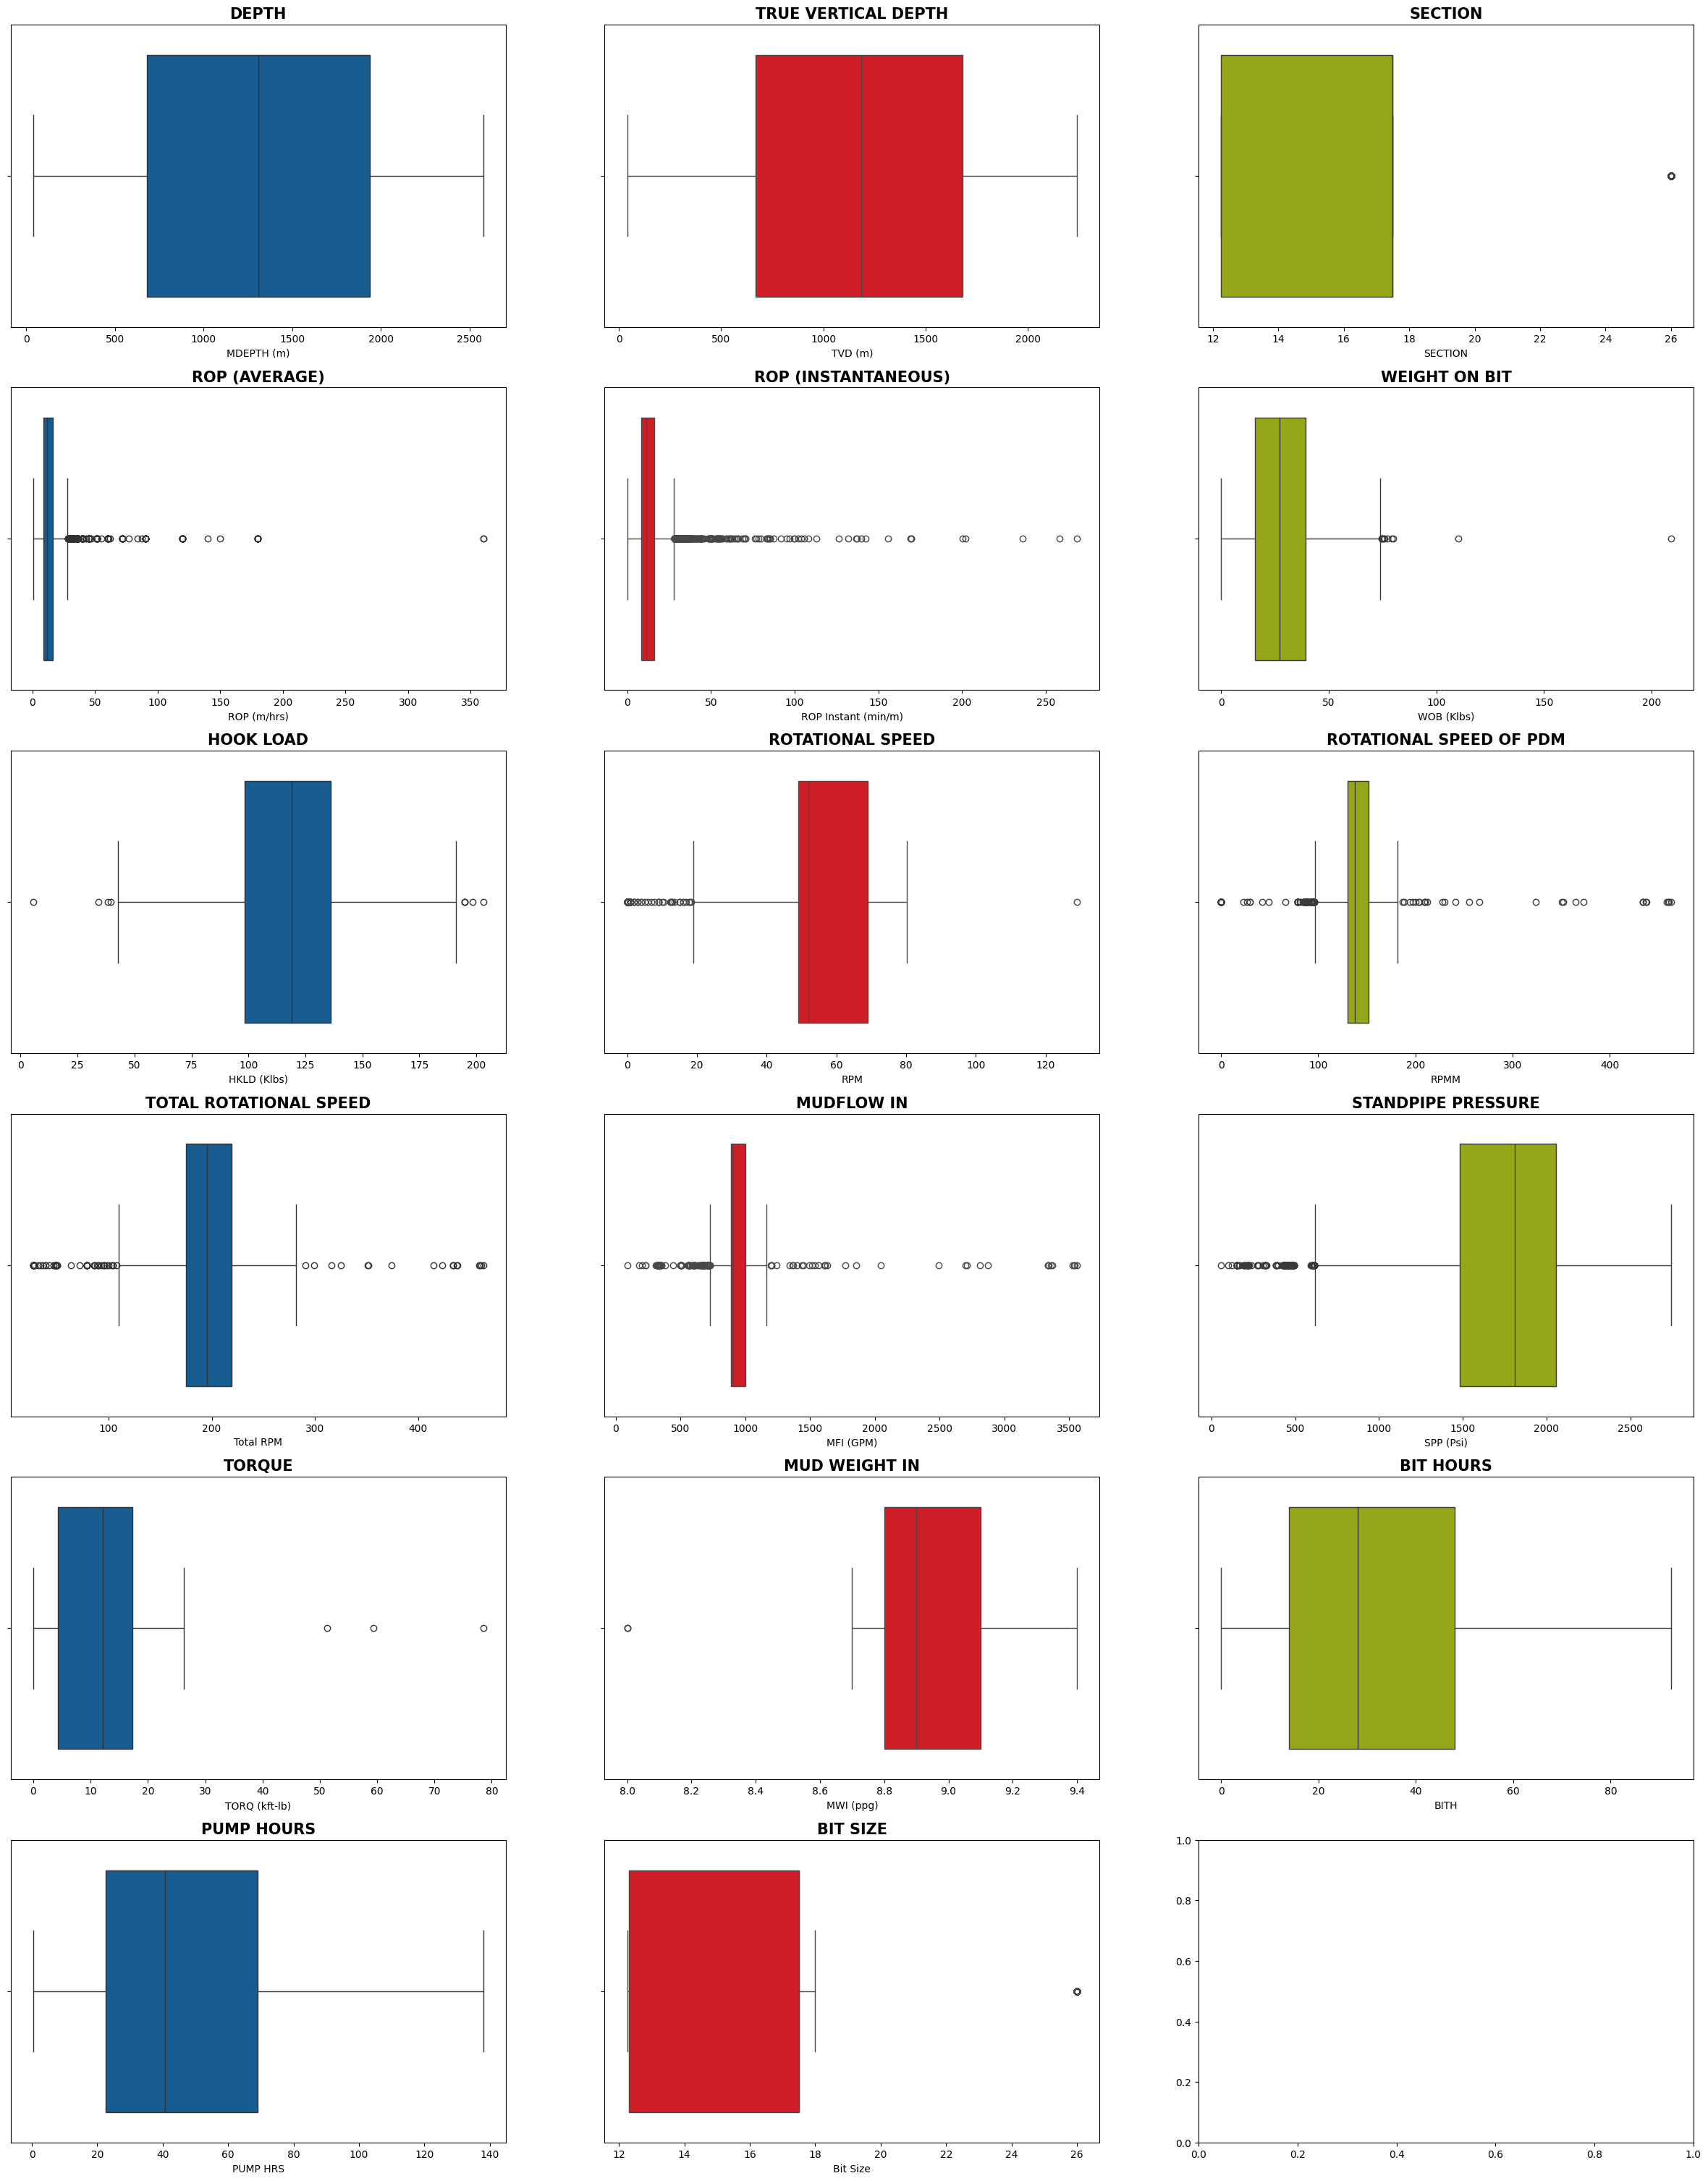

In [10]:
# Create Figure And Axis
fig, axes = plt.subplots(6, 3, figsize = (30, 38), facecolor = '#FFFFFF')

# Create Box-Plot For Depth
sns.boxplot(x = df['MDEPTH (m)'], color = "#025FA4", ax = axes[0, 0])
axes[0, 0].set_title('DEPTH', fontsize = 15, fontweight = 'bold')
axes[0, 0].set_facecolor('#FFFFFF')

# Create Box-Plot For True Vertical Depth
sns.boxplot(x = df['TVD (m)'], color = "#EC000E", ax = axes[0, 1])
axes[0, 1].set_title('TRUE VERTICAL DEPTH', fontsize = 15, fontweight = 'bold')
axes[0, 1].set_facecolor('#FFFFFF')

# Create Box-Plot For Section
sns.boxplot(x = df['SECTION'], color = "#A7BF01", ax = axes[0, 2])
axes[0, 2].set_title('SECTION', fontsize = 15, fontweight = 'bold')
axes[0, 2].set_facecolor('#FFFFFF')

# Create Box-Plot For Rate Of Penetration (Average)
sns.boxplot(x = df['ROP (m/hrs)'], color = "#025FA4", ax = axes[1, 0])
axes[1, 0].set_title('ROP (AVERAGE)', fontsize = 15, fontweight = 'bold')
axes[1, 0].set_facecolor('#FFFFFF')

# Create Box-Plot For Rate Of Penetration (Instantaneous)
sns.boxplot(x = df['ROP Instant (min/m)'], color = "#EC000E", ax = axes[1, 1])
axes[1, 1].set_title('ROP (INSTANTANEOUS)', fontsize = 15, fontweight = 'bold')
axes[1, 1].set_facecolor('#FFFFFF')

# Create Box-Plot For Weight On Bit
sns.boxplot(x = df['WOB (Klbs)'], color = "#A7BF01", ax = axes[1, 2])
axes[1, 2].set_title('WEIGHT ON BIT', fontsize = 15, fontweight = 'bold')
axes[1, 2].set_facecolor('#FFFFFF')

# Create Box-Plot For Hook Load
sns.boxplot(x = df['HKLD (Klbs)'], color = "#025FA4", ax = axes[2, 0])
axes[2, 0].set_title('HOOK LOAD', fontsize = 15, fontweight = 'bold')
axes[2, 0].set_facecolor('#FFFFFF')

# Create Box-Plot For Rotational Speed
sns.boxplot(x = df['RPM'], color = "#EC000E", ax = axes[2, 1])
axes[2, 1].set_title('ROTATIONAL SPEED', fontsize = 15, fontweight = 'bold')
axes[2, 1].set_facecolor('#FFFFFF')

# Create Box-Plot For Rotational Speed Of PDM (Positive Displacement Motor)
sns.boxplot(x = df['RPMM'], color = "#A7BF01", ax = axes[2, 2])
axes[2, 2].set_title('ROTATIONAL SPEED OF PDM', fontsize = 15, fontweight = 'bold')
axes[2, 2].set_facecolor('#FFFFFF')

# Create Box-Plot For Total Rotational Speed
sns.boxplot(x = df['Total RPM'], color = "#025FA4", ax = axes[3, 0])
axes[3, 0].set_title('TOTAL ROTATIONAL SPEED', fontsize = 15, fontweight = 'bold')
axes[3, 0].set_facecolor('#FFFFFF')

# Create Box-Plot For Mudflow In
sns.boxplot(x = df['MFI (GPM)'], color = "#EC000E", ax = axes[3, 1])
axes[3, 1].set_title('MUDFLOW IN', fontsize = 15, fontweight = 'bold')
axes[3, 1].set_facecolor('#FFFFFF')

# Create Box-Plot For Standpipe Pressure
sns.boxplot(x = df['SPP (Psi)'], color = "#A7BF01", ax = axes[3, 2])
axes[3, 2].set_title('STANDPIPE PRESSURE', fontsize = 15, fontweight = 'bold')
axes[3, 2].set_facecolor('#FFFFFF')

# Create Box-Plot For Torque
sns.boxplot(x = df['TORQ (kft-lb)'], color = "#025FA4", ax = axes[4, 0])
axes[4, 0].set_title('TORQUE', fontsize = 15, fontweight = 'bold')
axes[4, 0].set_facecolor('#FFFFFF')

# Create Box-Plot For Mud Weight In
sns.boxplot(x = df['MWI (ppg)'], color = "#EC000E", ax = axes[4, 1])
axes[4, 1].set_title('MUD WEIGHT IN', fontsize = 15, fontweight = 'bold')
axes[4, 1].set_facecolor('#FFFFFF')

# Create Box-Plot For Bit Hours
sns.boxplot(x = df['BITH'], color = "#A7BF01", ax = axes[4, 2])
axes[4, 2].set_title('BIT HOURS', fontsize = 15, fontweight = 'bold')
axes[4, 2].set_facecolor('#FFFFFF')

# Create Box-Plot For Pump Hours
sns.boxplot(x = df['PUMP HRS'], color = "#025FA4", ax = axes[5, 0])
axes[5, 0].set_title('PUMP HOURS', fontsize = 15, fontweight = 'bold')
axes[5, 0].set_facecolor('#FFFFFF')

# Create Box-Plot Bit Size
sns.boxplot(x = df['Bit Size'], color = "#EC000E", ax = axes[5, 1])
axes[5, 1].set_title('BIT SIZE', fontsize = 15, fontweight = 'bold')
axes[5, 1].set_facecolor('#FFFFFF')

plt.show()

## **Outliers Removal**

---

In [11]:
# Set Outlier using Z-score Method
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [12]:
# Dataset Description After Removing Outlier
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDEPTH (m),24553.0,1327.844186,720.214275,60.80,708.000,1327.70,1947.30,2577.00
TVD (m),24553.0,1183.818029,602.717659,60.80,692.012,1196.40,1685.70,2241.30
SECTION,24553.0,15.970421,4.479624,12.25,12.250,17.50,17.50,26.00
ROP (m/hrs),24553.0,12.750817,5.772673,0.60,8.400,11.61,16.36,37.00
ROP Instant (min/m),24553.0,12.484240,5.656538,0.00,8.280,11.40,16.08,35.90
WOB (Klbs),24553.0,27.490176,13.653784,0.00,16.280,27.40,39.37,68.58
HKLD (Klbs),24553.0,117.775947,25.983073,42.64,100.390,119.43,136.30,194.78
RPM,24553.0,49.391712,24.470797,0.00,49.000,52.80,69.00,80.10
RPMM,24553.0,139.844907,12.884551,92.00,130.000,138.00,152.00,172.00
Total RPM,24553.0,189.224677,31.960144,93.00,177.300,196.50,219.20,234.50


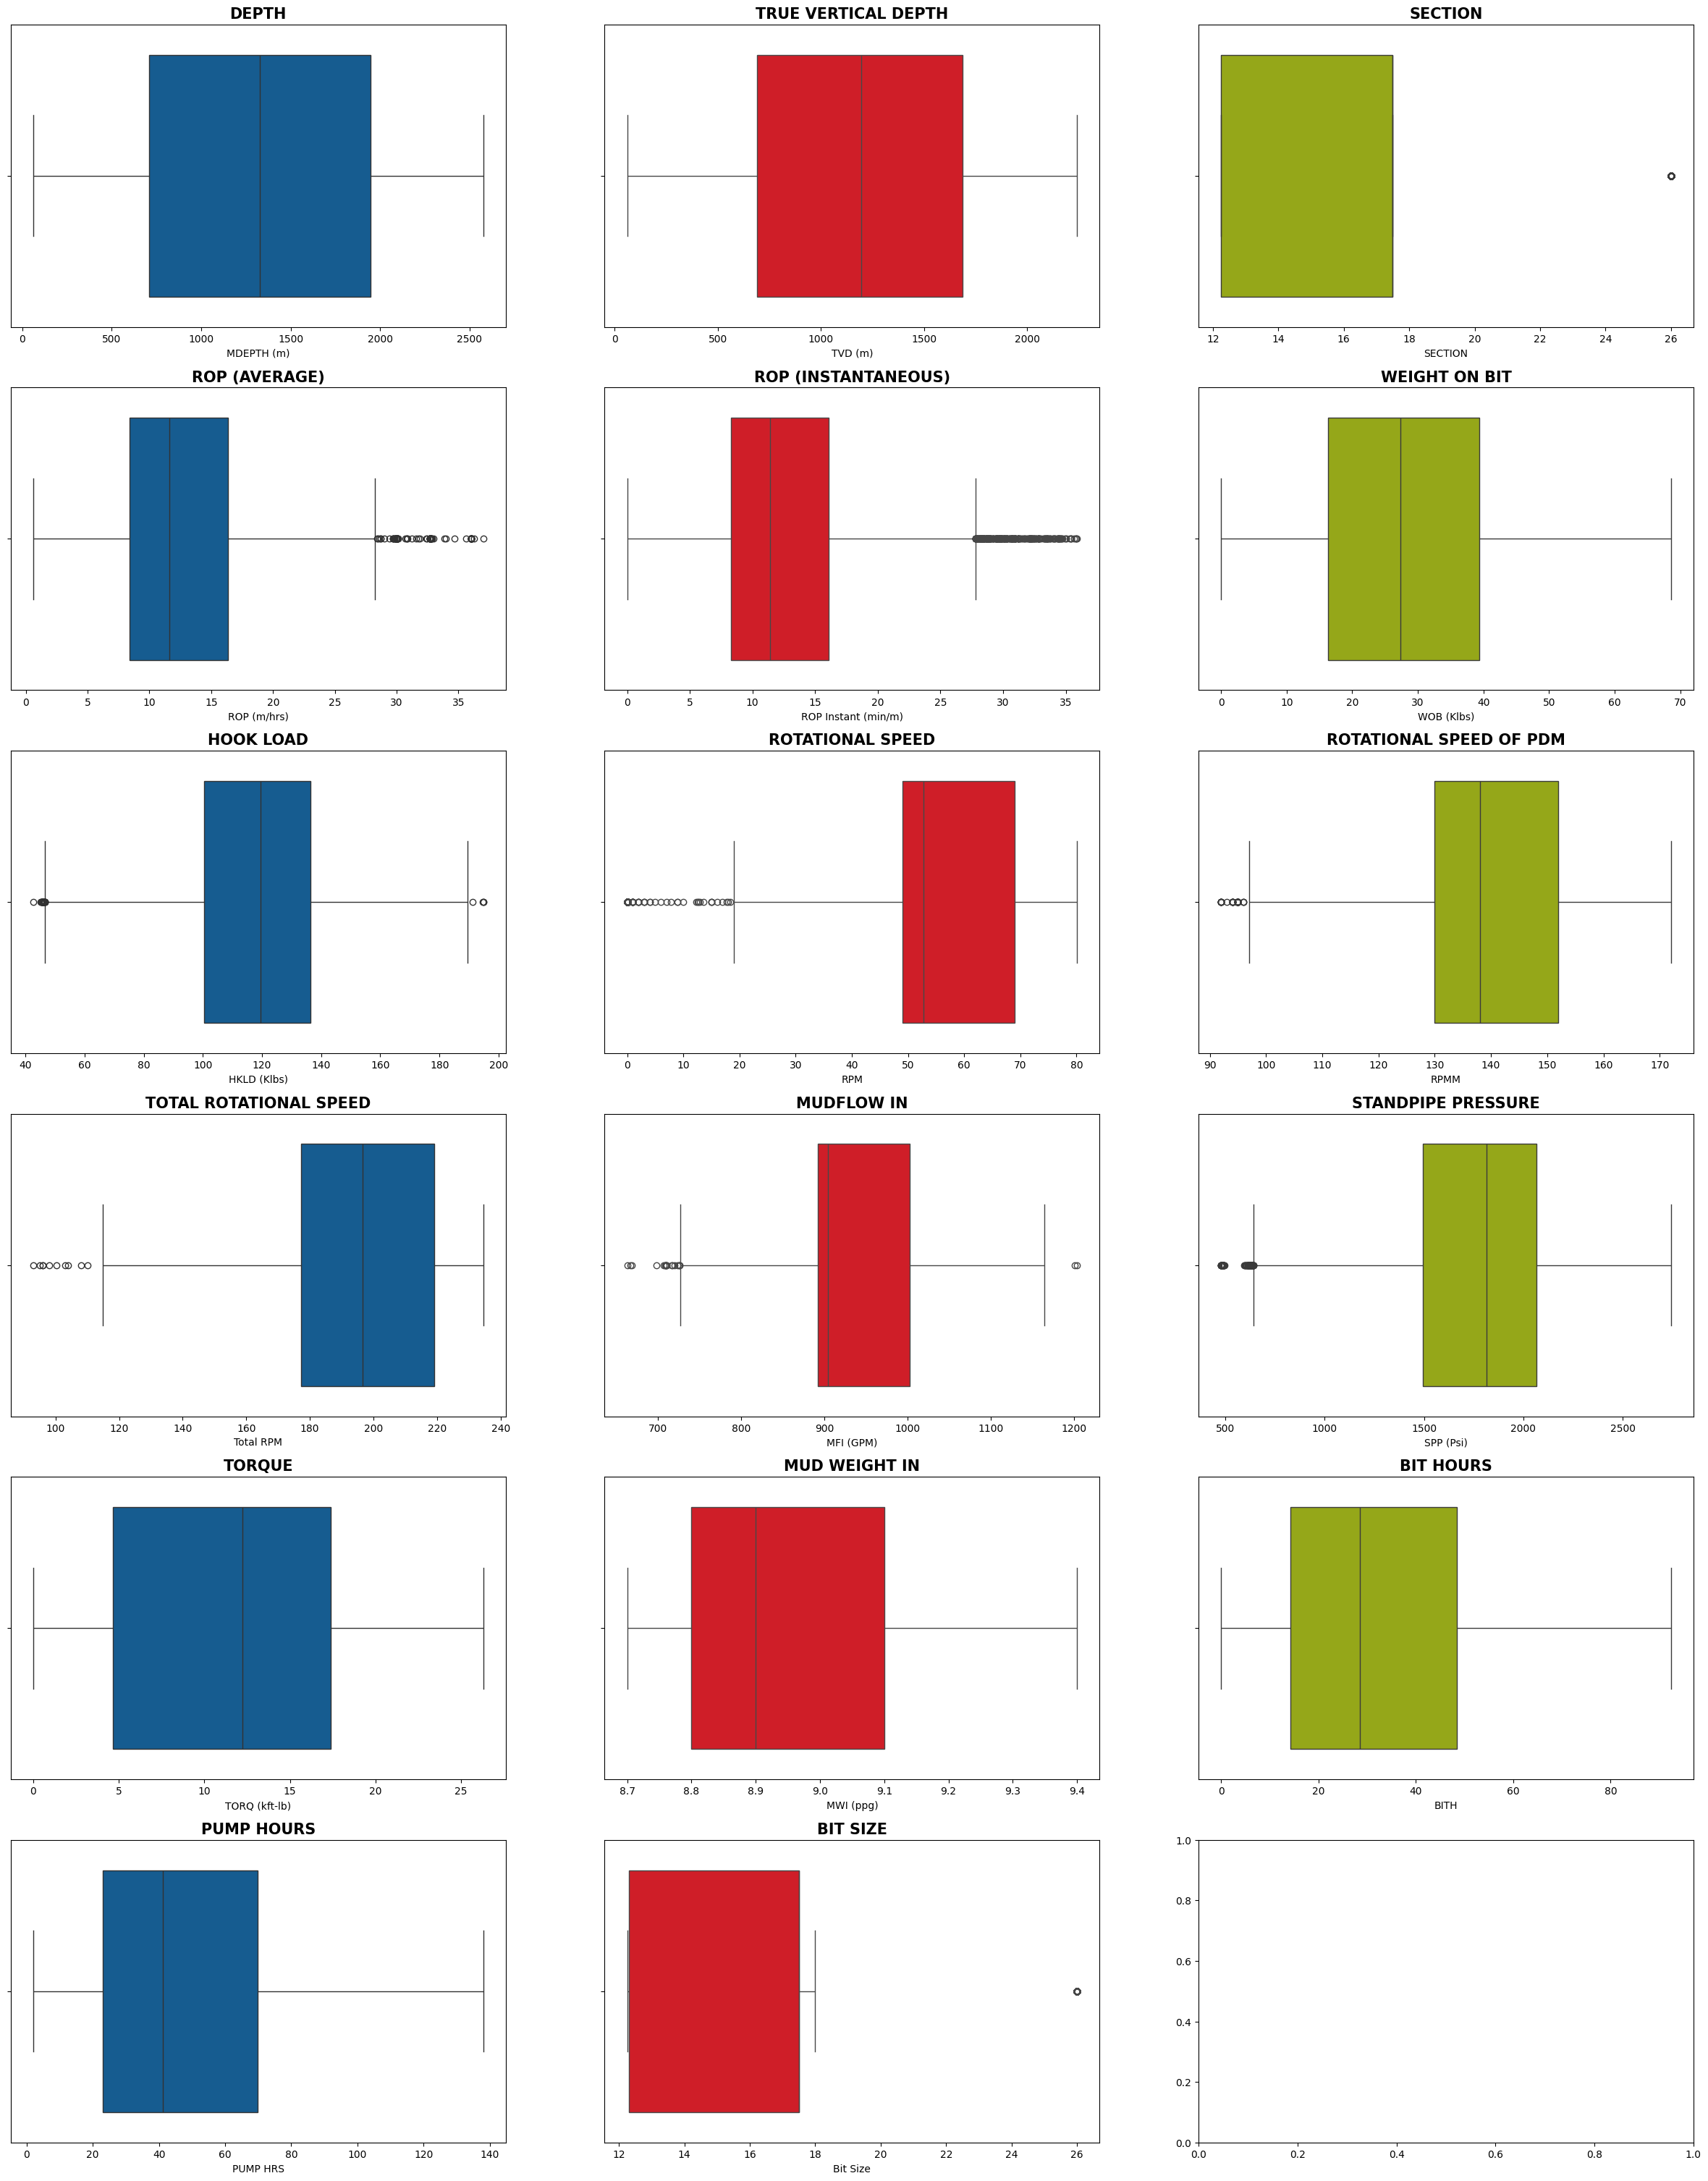

In [13]:
# Create Figure And Axis
fig, axes = plt.subplots(6, 3, figsize = (30, 38), facecolor = '#FFFFFF')

# Create Box-Plot For Depth
sns.boxplot(x = df['MDEPTH (m)'], color = "#025FA4", ax = axes[0, 0])
axes[0, 0].set_title('DEPTH', fontsize = 15, fontweight = 'bold')
axes[0, 0].set_facecolor('#FFFFFF')

# Create Box-Plot For True Vertical Depth
sns.boxplot(x = df['TVD (m)'], color = "#EC000E", ax = axes[0, 1])
axes[0, 1].set_title('TRUE VERTICAL DEPTH', fontsize = 15, fontweight = 'bold')
axes[0, 1].set_facecolor('#FFFFFF')

# Create Box-Plot For Section
sns.boxplot(x = df['SECTION'], color = "#A7BF01", ax = axes[0, 2])
axes[0, 2].set_title('SECTION', fontsize = 15, fontweight = 'bold')
axes[0, 2].set_facecolor('#FFFFFF')

# Create Box-Plot For Rate Of Penetration (Average)
sns.boxplot(x = df['ROP (m/hrs)'], color = "#025FA4", ax = axes[1, 0])
axes[1, 0].set_title('ROP (AVERAGE)', fontsize = 15, fontweight = 'bold')
axes[1, 0].set_facecolor('#FFFFFF')

# Create Box-Plot For Rate Of Penetration (Instantaneous)
sns.boxplot(x = df['ROP Instant (min/m)'], color = "#EC000E", ax = axes[1, 1])
axes[1, 1].set_title('ROP (INSTANTANEOUS)', fontsize = 15, fontweight = 'bold')
axes[1, 1].set_facecolor('#FFFFFF')

# Create Box-Plot For Weight On Bit
sns.boxplot(x = df['WOB (Klbs)'], color = "#A7BF01", ax = axes[1, 2])
axes[1, 2].set_title('WEIGHT ON BIT', fontsize = 15, fontweight = 'bold')
axes[1, 2].set_facecolor('#FFFFFF')

# Create Box-Plot For Hook Load
sns.boxplot(x = df['HKLD (Klbs)'], color = "#025FA4", ax = axes[2, 0])
axes[2, 0].set_title('HOOK LOAD', fontsize = 15, fontweight = 'bold')
axes[2, 0].set_facecolor('#FFFFFF')

# Create Box-Plot For Rotational Speed
sns.boxplot(x = df['RPM'], color = "#EC000E", ax = axes[2, 1])
axes[2, 1].set_title('ROTATIONAL SPEED', fontsize = 15, fontweight = 'bold')
axes[2, 1].set_facecolor('#FFFFFF')

# Create Box-Plot For Rotational Speed Of PDM (Positive Displacement Motor)
sns.boxplot(x = df['RPMM'], color = "#A7BF01", ax = axes[2, 2])
axes[2, 2].set_title('ROTATIONAL SPEED OF PDM', fontsize = 15, fontweight = 'bold')
axes[2, 2].set_facecolor('#FFFFFF')

# Create Box-Plot For Total Rotational Speed
sns.boxplot(x = df['Total RPM'], color = "#025FA4", ax = axes[3, 0])
axes[3, 0].set_title('TOTAL ROTATIONAL SPEED', fontsize = 15, fontweight = 'bold')
axes[3, 0].set_facecolor('#FFFFFF')

# Create Box-Plot For Mudflow In
sns.boxplot(x = df['MFI (GPM)'], color = "#EC000E", ax = axes[3, 1])
axes[3, 1].set_title('MUDFLOW IN', fontsize = 15, fontweight = 'bold')
axes[3, 1].set_facecolor('#FFFFFF')

# Create Box-Plot For Standpipe Pressure
sns.boxplot(x = df['SPP (Psi)'], color = "#A7BF01", ax = axes[3, 2])
axes[3, 2].set_title('STANDPIPE PRESSURE', fontsize = 15, fontweight = 'bold')
axes[3, 2].set_facecolor('#FFFFFF')

# Create Box-Plot For Torque
sns.boxplot(x = df['TORQ (kft-lb)'], color = "#025FA4", ax = axes[4, 0])
axes[4, 0].set_title('TORQUE', fontsize = 15, fontweight = 'bold')
axes[4, 0].set_facecolor('#FFFFFF')

# Create Box-Plot For Mud Weight In
sns.boxplot(x = df['MWI (ppg)'], color = "#EC000E", ax = axes[4, 1])
axes[4, 1].set_title('MUD WEIGHT IN', fontsize = 15, fontweight = 'bold')
axes[4, 1].set_facecolor('#FFFFFF')

# Create Box-Plot For Bit Hours
sns.boxplot(x = df['BITH'], color = "#A7BF01", ax = axes[4, 2])
axes[4, 2].set_title('BIT HOURS', fontsize = 15, fontweight = 'bold')
axes[4, 2].set_facecolor('#FFFFFF')

# Create Box-Plot For Pump Hours
sns.boxplot(x = df['PUMP HRS'], color = "#025FA4", ax = axes[5, 0])
axes[5, 0].set_title('PUMP HOURS', fontsize = 15, fontweight = 'bold')
axes[5, 0].set_facecolor('#FFFFFF')

# Create Box-Plot Bit Size
sns.boxplot(x = df['Bit Size'], color = "#EC000E", ax = axes[5, 1])
axes[5, 1].set_title('BIT SIZE', fontsize = 15, fontweight = 'bold')
axes[5, 1].set_facecolor('#FFFFFF')

plt.show()

## **Multivariate Data Analysis**

---

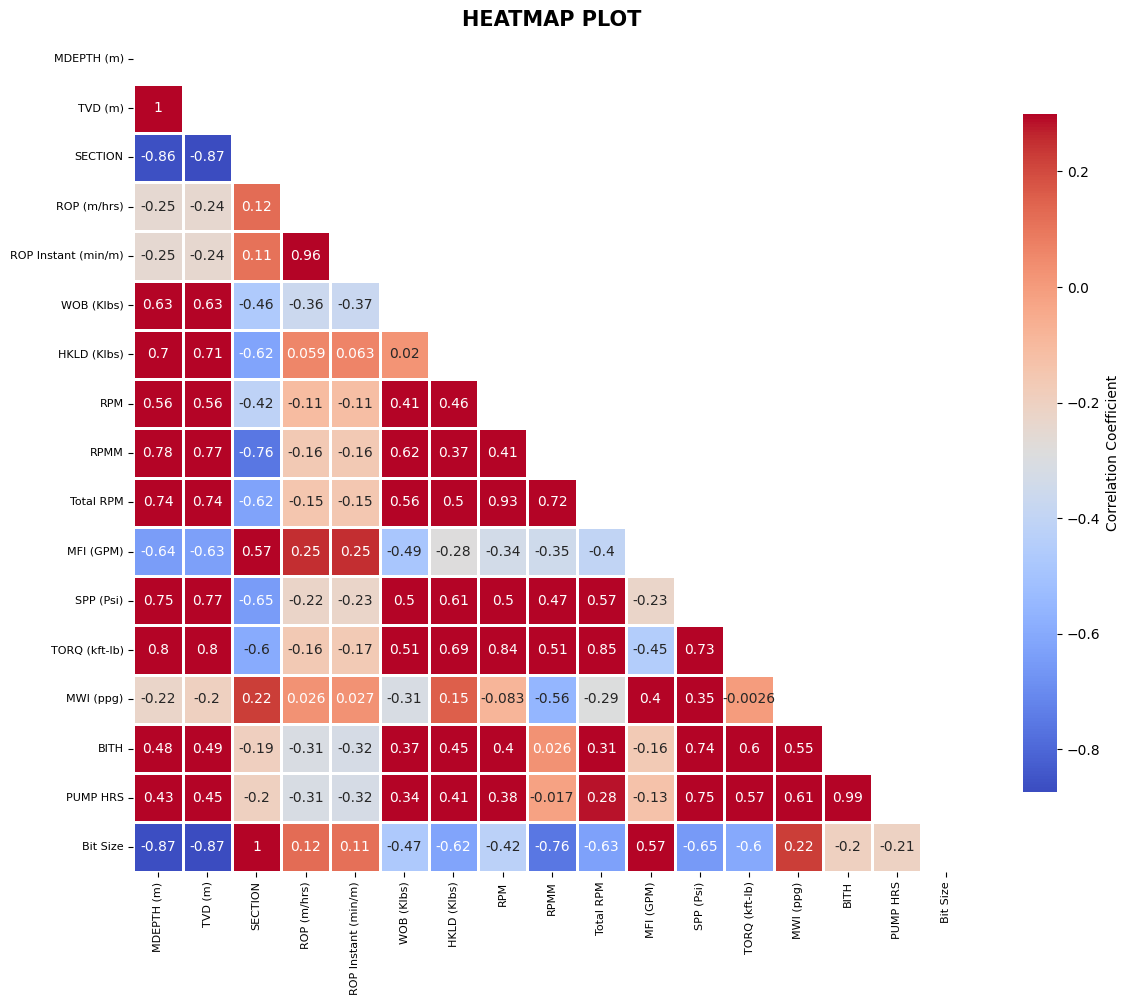

In [14]:
# Generate a mask for the upper triangle
corr = df.corr(method = 'pearson')
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
plt.figure(figsize = (12, 10), facecolor = '#FFFFFF')
sns.heatmap(corr, annot = True, mask = mask, cmap = 'coolwarm', vmax = .3, linewidths = 2, square = True,
            cbar_kws = {'shrink':.8, 'label': 'Correlation Coefficient'})

plt.title('HEATMAP PLOT', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.tight_layout()

plt.show()

**Multi-Colinearity Analysis for Feature Selection**

Remove any parameters that have strong relation each other, based on heatmap plot above, such as:

*   MDEPTH, because of the strong relation with TVD
*   Section, because of the strong relation with bit size
*   ROP Instant, because of the strong relation with ROP
*   RPM, because of the strong relation with Total RPM
*   RPMM, because of the strong relation with Total RPM

In [15]:
df = df.drop(columns = ['MDEPTH (m)', 'SECTION', 'ROP Instant (min/m)','RPM', 'RPMM'])

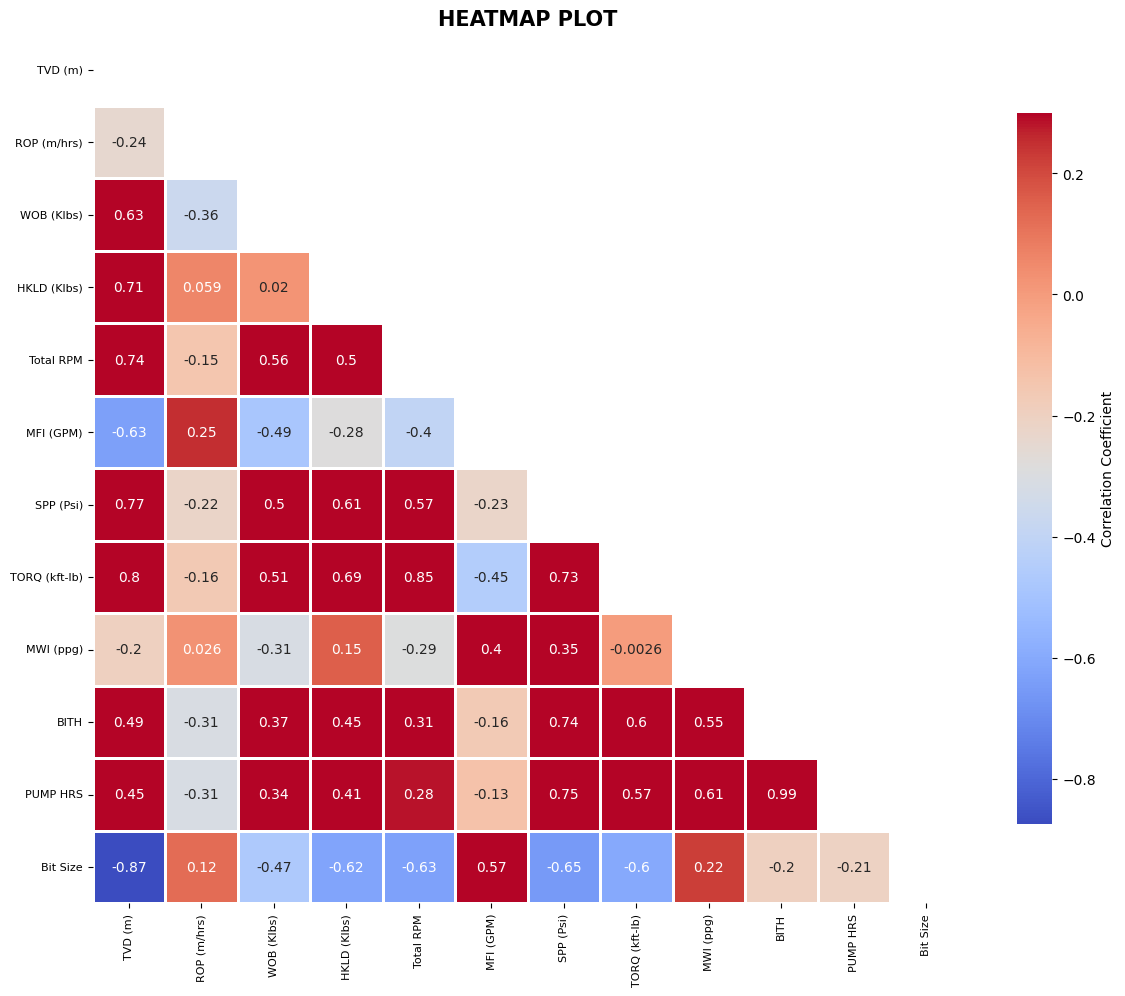

In [16]:
# Generate a mask for the upper triangle
corr = df.corr(method = 'pearson')
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
plt.figure(figsize = (12, 10), facecolor = '#FFFFFF')
sns.heatmap(corr, annot = True, mask = mask, cmap = 'coolwarm', vmax = .3, linewidths = 2, square = True,
            cbar_kws = {'shrink':.8, 'label': 'Correlation Coefficient'})

plt.title('HEATMAP PLOT', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.tight_layout()

plt.show()

# **Data Preprocessing**

In [17]:
# Set Independent Features & Dependent Features Data
X = df.drop(columns = ['ROP (m/hrs)'], axis = 1)
Y = df['ROP (m/hrs)']

In [18]:
# Split Data Training & Data Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [19]:
# Standardization Using Standard Scaler
scalerX = StandardScaler().fit(X_train)
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

In [20]:
# Split For Modelling MLP Regressor
X_train_mlp = X_train; Y_train_mlp = Y_train; X_train_scaled_mlp = X_train_scaled
X_test_mlp = X_test; Y_test_mlp = Y_test; X_test_scaled_mlp = X_test_scaled

# Split For Modelling Random Forest Regressor
X_train_rf = X_train; Y_train_rf = Y_train; X_train_scaled_rf = X_train_scaled
X_test_rf = X_test; Y_test_rf = Y_test; X_test_scaled_rf = X_test_scaled

# Split For Modelling XGBoost Regressor
X_train_xgb = X_train; Y_train_xgb = Y_train; X_train_scaled_xgb = X_train_scaled
X_test_xgb = X_test; Y_test_xgb = Y_test; X_test_scaled_xgb = X_test_scaled

# **MLP Model**

## **Train & Test Modelling**

---



In [21]:
# MLP Regressor Modeling
mlp_regressor = MLPRegressor(hidden_layer_sizes = (150,100,50), activation = 'relu', solver = 'adam', alpha = 0.0001, batch_size = 'auto', learning_rate = 'constant',
                            learning_rate_init = 0.001, power_t = 0.5, max_iter = 300, shuffle = True, random_state = None, tol = 0.0001, verbose = False, warm_start = False,
                            momentum = 0.9, nesterovs_momentum = True, early_stopping = False, validation_fraction = 0.1, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08,
                            n_iter_no_change = 10)
mlp_regressor.fit(X_train_scaled_mlp, Y_train_mlp)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

### **Train Modelling**

In [22]:
# Make Predictions & Evaluate The Model's Performance
Y_pred_train_mlp = mlp_regressor.predict(X_train_scaled_mlp)

# Calculate The Metrics
r2_train = round(r2_score(Y_train_mlp, Y_pred_train_mlp),4)
mape_train = round(metrics.mean_absolute_percentage_error(Y_train_mlp, Y_pred_train_mlp),4)
mae_train = round(metrics.mean_absolute_error(Y_train_mlp, Y_pred_train_mlp),4)
rmse_train = round(sqrt(metrics.mean_squared_error(Y_train_mlp, Y_pred_train_mlp)),4)
mse_train = round(metrics.mean_squared_error(Y_train_mlp, Y_pred_train_mlp),4)

# Print The Metrics
print('Metrics Score Train Before Hyperparameter Tuning')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Train Before Hyperparameter Tuning
R2	 0.6957
MAPE	 0.2024
MAE	 2.2712
RMSE	 3.1726
MSE	 10.0653


### **Test Modelling**

In [23]:
# Make Predictions & Evaluate The Model's Performance
Y_pred_test_mlp = mlp_regressor.predict(X_test_scaled_mlp)

# Calculate The Metrics
MLP_r2_test = round(r2_score(Y_test_mlp, Y_pred_test_mlp),4)
mape_test = round(metrics.mean_absolute_percentage_error(Y_test_mlp, Y_pred_test_mlp),4)
mae_test = round(metrics.mean_absolute_error(Y_test_mlp, Y_pred_test_mlp),4)
rmse_test = round(sqrt(metrics.mean_squared_error(Y_test_mlp, Y_pred_test_mlp)),4)
mse_test = round(metrics.mean_squared_error(Y_test_mlp, Y_pred_test_mlp),4)

# Print The Metrics
print('Metrics Score Test Before Hyperparameter Tuning')
print('R2\t', MLP_r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test Before Hyperparameter Tuning
R2	 0.6449
MAPE	 0.2247
MAE	 2.4668
RMSE	 3.4696
MSE	 12.0381


In [24]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    mlp_regressor.fit(X_train_scaled_mlp, Y_train_mlp)
    predictions_nn = mlp_regressor.predict(X_test_scaled_mlp)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 78.08 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

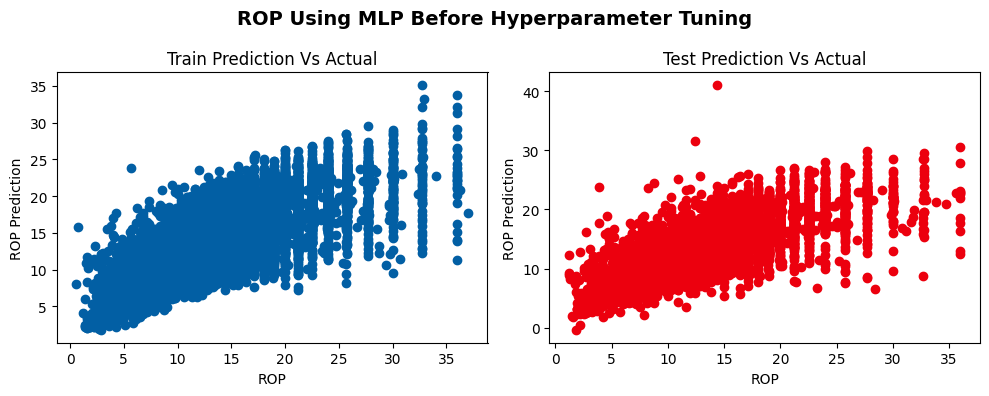

In [25]:
# Prediction & Test Graph of Predicted Vs Actual ROP on MLP Before Hyperparameter Tuning
def visualize_performance(Y_train_mlp, Y_pred_train_mlp, Y_test_mlp, Y_pred_test_mlp):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#FFFFFF')

    # Training set scatter plot
    axs[0].scatter(Y_train_mlp, Y_pred_train_mlp, color="#025FA4")
    axs[0].set_facecolor('#FFFFFF')
    axs[0].set_xlabel("ROP")
    axs[0].set_ylabel("ROP Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(Y_test_mlp, Y_pred_test_mlp, color="#EC000E")
    axs[1].set_facecolor('#FFFFFF')
    axs[1].set_xlabel("ROP")
    axs[1].set_ylabel("ROP Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.suptitle("ROP Using MLP Before Hyperparameter Tuning", fontweight = 'bold', fontsize = 14)
    plt.tight_layout()
    plt.show()

visualize_performance(Y_train_mlp, Y_pred_train_mlp, Y_test_mlp, Y_pred_test_mlp)

## **Hyperparameter Tuning**

---

In [26]:
# Set Parameter Hyperparameter Tuning Model MLP Regressor
parameters = {'solver' : ['sgd', 'adam'],
              'hidden_layer_sizes' : [(100,), (120,80,40), (100,50,30), (150,100,50)],
              'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'alpha' : [0.0001, 0.001, 0.01, 0.1],
              'learning_rate_init' : [0.001, 0.01],
              'max_iter' : [50, 100, 300, 500, 1000]}

# Set RandomizedSearchCV for Hyperparameter Tuning Model MLP Regressor
mlp_base = MLPRegressor(random_state = 0)
mlp_random_search = RandomizedSearchCV(mlp_base, parameters, n_iter = 10, cv = 3, verbose = 2, random_state = 0,
                               n_jobs = -1, return_train_score = True)

# Fit The Model To The Training Data
mlp_random_search.fit(X_train_scaled_mlp, Y_train_mlp)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=MLPRegressor(random_state=0), n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(100,),
                                                               (120, 80, 40),
                                                               (100, 50, 30),
                                                               (150, 100, 50)],
                                        'learning_rate_init': [0.001, 0.01],
                                        'max_iter': [50, 100, 300, 500, 1000],
                                        'solver': ['sgd', 'adam']},
                   random_state=0, return_train_score=True, verbose=2)

In [27]:
# Best Hyperparameter Tuning Model MLP Regressor
mlp_random_search.best_params_

{'solver': 'sgd',
 'max_iter': 300,
 'learning_rate_init': 0.001,
 'hidden_layer_sizes': (100, 50, 30),
 'alpha': 0.0001,
 'activation': 'tanh'}

In [28]:
# Set Best Hyperparameter Tuning Model MLP Regressor
best_random_mlp = mlp_random_search.best_estimator_
best_random_mlp.fit(X_train_scaled_mlp, Y_train_mlp)

MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 50, 30), max_iter=300,
             random_state=0, solver='sgd')

### **Train Modelling**

In [29]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_train_mlp = best_random_mlp.predict(X_train_scaled_mlp)

# Calculate The Metrics
r2_train = round(r2_score(Y_train_mlp, best_prediction_train_mlp),4)
mape_train = round(metrics.mean_absolute_percentage_error(Y_train_mlp, best_prediction_train_mlp),4)
mae_train = round(metrics.mean_absolute_error(Y_train_mlp, best_prediction_train_mlp),4)
rmse_train = round(sqrt(metrics.mean_squared_error(Y_train_mlp, best_prediction_train_mlp)),4)
mse_train = round(metrics.mean_squared_error(Y_train_mlp, best_prediction_train_mlp),4)

# Print The Metrics
print('Metrics Score Training After Hyperparameter Tuning')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Training After Hyperparameter Tuning
R2	 0.7096
MAPE	 0.2004
MAE	 2.2408
RMSE	 3.0993
MSE	 9.6054


### **Test Modelling**

In [30]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_test_mlp = best_random_mlp.predict(X_test_scaled_mlp)

# Calculate The Metrics
r2_test = round(r2_score(Y_test_mlp, best_prediction_test_mlp),4)
mape_test = round(metrics.mean_absolute_percentage_error(Y_test_mlp, best_prediction_test_mlp),4)
mae_test = round(metrics.mean_absolute_error(Y_test_mlp, best_prediction_test_mlp),4)
rmse_test = round(sqrt(metrics.mean_squared_error(Y_test_mlp, best_prediction_test_mlp)),4)
mse_test = round(metrics.mean_squared_error(Y_test_mlp, best_prediction_test_mlp),4)

# Print The Metrics
print('Metrics Score Test After Hyperparameter Tuning')
print('R2\t', r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test After Hyperparameter Tuning
R2	 0.6455
MAPE	 0.2266
MAE	 2.4726
RMSE	 3.4668
MSE	 12.0184


In [31]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    best_random_mlp.fit(X_train_scaled_mlp, Y_train_mlp)
    predictions_nn = best_random_mlp.predict(X_test_scaled_mlp)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 137.37 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

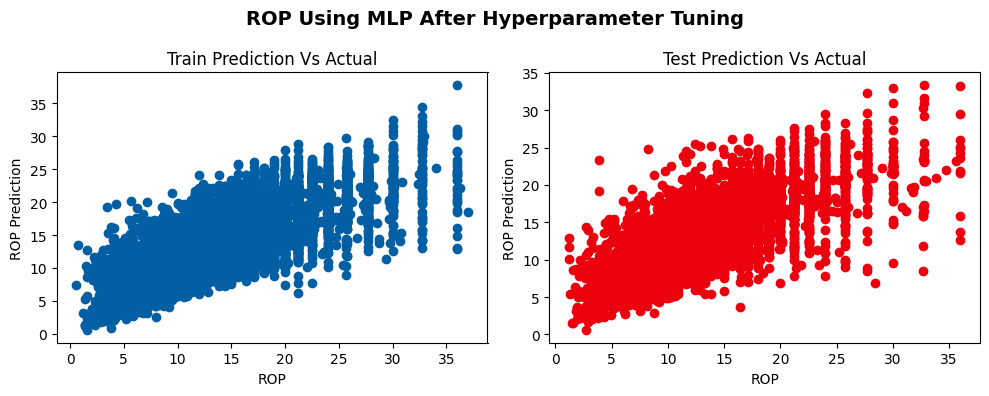

In [32]:
# Prediction & Test Graph of Predicted Vs Actual ROP on MLP After Hyperparameter Tuning
def visualize_performance(Y_train_mlp, best_prediction_train_mlp, Y_test_mlp, best_prediction_test_mlp):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#FFFFFF')

    # Training set scatter plot
    axs[0].scatter(Y_train_mlp, best_prediction_train_mlp, color="#025FA4")
    axs[0].set_facecolor('#FFFFFF')
    axs[0].set_xlabel("ROP")
    axs[0].set_ylabel("ROP Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(Y_test_mlp, best_prediction_test_mlp, color="#EC000E")
    axs[1].set_facecolor('#FFFFFF')
    axs[1].set_xlabel("ROP")
    axs[1].set_ylabel("ROP Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.suptitle("ROP Using MLP After Hyperparameter Tuning", fontweight = 'bold', fontsize = 14)
    plt.tight_layout()
    plt.show()

visualize_performance(Y_train_mlp, best_prediction_train_mlp, Y_test_mlp, best_prediction_test_mlp)

## **Learning Curve**

---



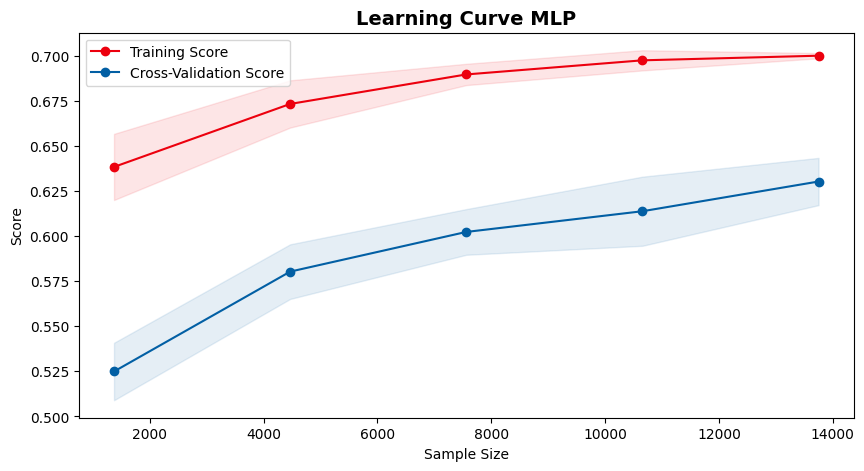

In [33]:
# Define the MLPRegressor Model
mlp_regressor = MLPRegressor(**mlp_random_search.best_params_)

# Define The Train Sizes
train_sizes = np.linspace(0.1, 1.0, 5)

# Generate The Learning Curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(mlp_regressor,
                                                                      X_train_scaled_mlp,
                                                                      Y_train_mlp,
                                                                      cv = 5,
                                                                      train_sizes = train_sizes,
                                                                      return_times = True)

# Calculate The Mean & Standard Deviation Of The Train And Test Scores
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

# Calculate The Mean And Standard Deviation Of The Fit Times
fit_times_mean = np.mean(fit_times, axis = 1)
fit_times_std = np.std(fit_times, axis = 1)

# Create The Plot
fig, axes = plt.subplots(1, 1, figsize = (10, 5))

# Plot The Training Scores
axes.plot(train_sizes, train_scores_mean, "o-", color = "#EC000E", label = "Training Score")
axes.fill_between(train_sizes,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha = 0.1,
                  color = "#EC000E")

# Plot The Cross-validation Scores
axes.plot(train_sizes, test_scores_mean, "o-", color = "#025FA4", label = "Cross-Validation Score")
axes.fill_between(train_sizes,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha = 0.1,
                  color = "#025FA4")

# Add The Legend
axes.legend()
axes.set_xlabel('Sample Size')
axes.set_ylabel('Score')
axes.set_title("Learning Curve MLP", fontweight = 'bold', fontsize = 14)

# Show The Plot
plt.show()

# **Random Forest Model**

## **Train & Test Modelling**

---



In [34]:
# Random Forest Modeling
rf_regressor = RandomForestRegressor(random_state=0)
rf_regressor.fit(X_train_scaled_rf, Y_train_rf)

RandomForestRegressor(random_state=0)

### **Train Modelling**

In [35]:
# Make Predictions & Evaluate The Model's Performance
Y_pred_train_rf = rf_regressor.predict(X_train_scaled_rf)

# Calculate The Metrics
r2_train = round(r2_score(Y_train_rf, Y_pred_train_rf),4)
mape_train = round(metrics.mean_absolute_percentage_error(Y_train_rf, Y_pred_train_rf),4)
mae_train = round(metrics.mean_absolute_error(Y_train_rf, Y_pred_train_rf),4)
rmse_train = round(sqrt(metrics.mean_squared_error(Y_train_rf, Y_pred_train_rf)),4)
mse_train = round(metrics.mean_squared_error(Y_train_rf, Y_pred_train_rf),4)

# Print The Metrics
print('Metrics Score Train Before Hyperparameter Tuning')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Train Before Hyperparameter Tuning
R2	 0.956
MAPE	 0.0756
MAE	 0.837
RMSE	 1.207
MSE	 1.4568


### **Test Modelling**

In [36]:
# Make Predictions & Evaluate The Model's Performance
Y_pred_test_rf = rf_regressor.predict(X_test_scaled_rf)

# Calculate The Metrics
MLP_r2_test = round(r2_score(Y_test_rf, Y_pred_test_rf),4)
mape_test = round(metrics.mean_absolute_percentage_error(Y_test_rf, Y_pred_test_rf),4)
mae_test = round(metrics.mean_absolute_error(Y_test_rf, Y_pred_test_rf),4)
rmse_test = round(sqrt(metrics.mean_squared_error(Y_test_rf, Y_pred_test_rf)),4)
mse_test = round(metrics.mean_squared_error(Y_test_rf, Y_pred_test_rf),4)

# Print The Metrics
print('Metrics Score Test Before Hyperparameter Tuning')
print('R2\t', MLP_r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test Before Hyperparameter Tuning
R2	 0.6986
MAPE	 0.2045
MAE	 2.2454
RMSE	 3.1967
MSE	 10.2186


In [37]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    rf_regressor.fit(X_train_scaled_rf, Y_train_rf)
    predictions_nn = rf_regressor.predict(X_test_scaled_rf)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 18.13 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

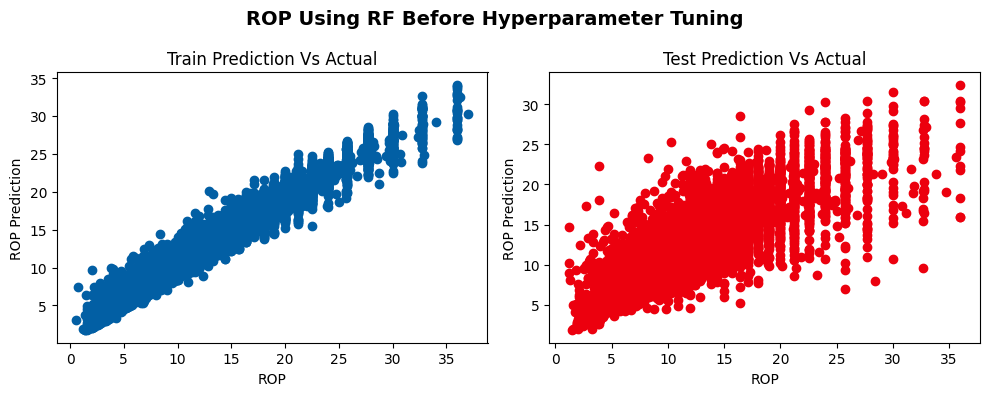

In [38]:
# Prediction & Test Graph of Predicted Vs Actual ROP on RF Before Hyperparameter Tuning
def visualize_performance(Y_train_rf, Y_pred_train_rf, Y_test_rf, Y_pred_test_rf):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#FFFFFF')

    # Training set scatter plot
    axs[0].scatter(Y_train_rf, Y_pred_train_rf, color="#025FA4")
    axs[0].set_facecolor('#FFFFFF')
    axs[0].set_xlabel("ROP")
    axs[0].set_ylabel("ROP Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(Y_test_rf, Y_pred_test_rf, color="#EC000E")
    axs[1].set_facecolor('#FFFFFF')
    axs[1].set_xlabel("ROP")
    axs[1].set_ylabel("ROP Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.suptitle("ROP Using RF Before Hyperparameter Tuning", fontweight = 'bold', fontsize = 14)

    plt.tight_layout()
    plt.show()

visualize_performance(Y_train_rf, Y_pred_train_rf, Y_test_rf, Y_pred_test_rf)

## **Hyperparameter Tuning**

---

In [39]:
# Set Parameter Hyperparameter Tuning Model RF Regressor
parameters = {'n_estimators': [int(x) for x in np.linspace(start = 2, stop = 2000, num = 50)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(4, 30, num = 2)],
               'min_samples_split': [2, 3, 4, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

# Set RandomizedSearchCV for Hyperparameter Tuning Model RF Regressor
rf_base = RandomForestRegressor(random_state=0)
rf_random_search = RandomizedSearchCV(rf_base, parameters, n_iter = 10, cv = 3, verbose = 2, random_state = 0,
                               n_jobs = -1, return_train_score = True)

# Fit The Model To The Training Data
rf_random_search.fit(X_train_scaled_rf, Y_train_rf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 4, 5, 10],
                                        'n_estimators': [2, 42, 83, 124, 165,
                                                         205, 246, 287, 328,
                                                         368, 409, 450, 491,
                                                         532, 572, 613, 654,
                                                         695, 735, 776, 817,
                                                         858, 899, 939, 980,
                                                         1021, 1062, 1102, 1143,
                                                         1184, ...]},
                   random_state=0, return_train_score=True, verbose=2)

In [40]:
# Best Hyperparameter Tuning Model RF Regressor
rf_random_search.best_params_

{'n_estimators': 287,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [41]:
# Set Best Hyperparameter Tuning Model RF Regressor
best_random_rf = rf_random_search.best_estimator_
best_random_rf.fit(X_train_scaled_rf, Y_train_rf)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=287, random_state=0)

### **Train Modelling**

In [42]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_train_rf = best_random_rf.predict(X_train_scaled_rf)

# Calculate The Metrics
r2_train = round(r2_score(Y_train_rf, best_prediction_train_rf),4)
mape_train = round(metrics.mean_absolute_percentage_error(Y_train_rf, best_prediction_train_rf),4)
mae_train = round(metrics.mean_absolute_error(Y_train_rf, best_prediction_train_rf),4)
rmse_train = round(sqrt(metrics.mean_squared_error(Y_train_rf, best_prediction_train_rf)),4)
mse_train = round(metrics.mean_squared_error(Y_train_rf, best_prediction_train_rf),4)

# Print The Metrics
print('Metrics Score Training After Hyperparameter Tuning')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Training After Hyperparameter Tuning
R2	 0.9071
MAPE	 0.1071
MAE	 1.1849
RMSE	 1.7527
MSE	 3.0721


### **Test Modelling**

In [43]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_test_rf = best_random_rf.predict(X_test_scaled_rf)

# Calculate The Metrics
r2_test = round(r2_score(Y_test_rf, best_prediction_test_rf),4)
mape_test = round(metrics.mean_absolute_percentage_error(Y_test_rf, best_prediction_test_rf),4)
mae_test = round(metrics.mean_absolute_error(Y_test_rf, best_prediction_test_rf),4)
rmse_test = round(sqrt(metrics.mean_squared_error(Y_test_rf, best_prediction_test_rf)),4)
mse_test = round(metrics.mean_squared_error(Y_test_rf, best_prediction_test_rf),4)

# Print The Metrics
print('Metrics Score Test After Hyperparameter Tuning')
print('R2\t', r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test After Hyperparameter Tuning
R2	 0.7118
MAPE	 0.2004
MAE	 2.1937
RMSE	 3.126
MSE	 9.7716


In [44]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    best_random_rf.fit(X_train_scaled_rf, Y_train_rf)
    predictions_nn = best_random_rf.predict(X_test_scaled_rf)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 14.16 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

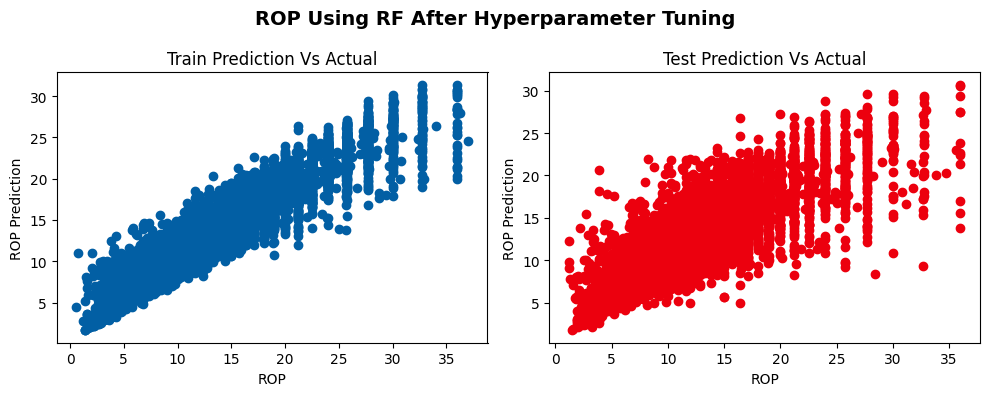

In [45]:
# Prediction & Test Graph of Predicted Vs Actual Pore Pressure on RF After Hyperparameter Tuning
def visualize_performance(Y_train_rf, best_prediction_train_rf, Y_test_rf, best_prediction_test_rf):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#FFFFFF')

    # Training set scatter plot
    axs[0].scatter(Y_train_rf, best_prediction_train_rf, color="#025FA4")
    axs[0].set_facecolor('#FFFFFF')
    axs[0].set_xlabel("ROP")
    axs[0].set_ylabel("ROP Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(Y_test_rf, best_prediction_test_rf, color="#EC000E")
    axs[1].set_facecolor('#FFFFFF')
    axs[1].set_xlabel("ROP")
    axs[1].set_ylabel("ROP Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.suptitle("ROP Using RF After Hyperparameter Tuning", fontweight = 'bold', fontsize = 14)
    plt.tight_layout()
    plt.show()

visualize_performance(Y_train_rf, best_prediction_train_rf, Y_test_rf, best_prediction_test_rf)

## **Learning Curve**

---



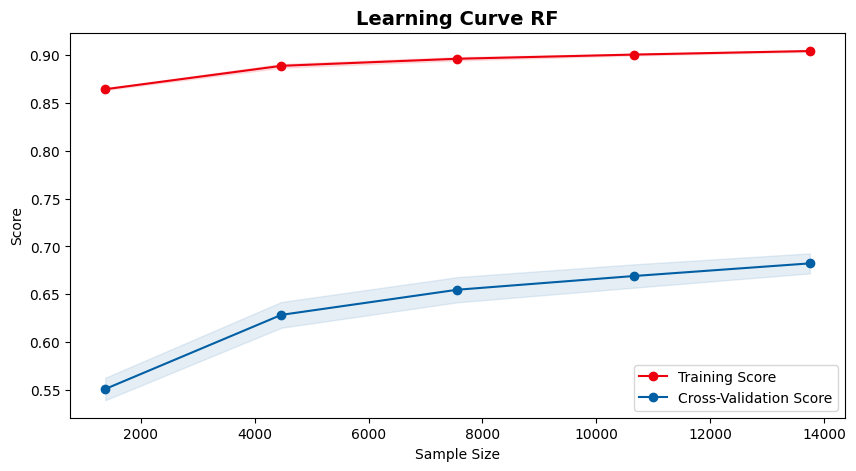

In [46]:
# Define the RF Regressor Model
rf_regressor = RandomForestRegressor(**rf_random_search.best_params_)

# Define The Train Sizes
train_sizes = np.linspace(0.1, 1.0, 5)

# Generate The Learning Curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(rf_regressor,
                                                                      X_train_scaled_rf,
                                                                      Y_train_rf,
                                                                      cv = 5,
                                                                      train_sizes = train_sizes,
                                                                      return_times = True)

# Calculate The Mean & Standard Deviation Of The Train And Test Scores
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

# Calculate The Mean And Standard Deviation Of The Fit Times
fit_times_mean = np.mean(fit_times, axis = 1)
fit_times_std = np.std(fit_times, axis = 1)

# Create The Plot
fig, axes = plt.subplots(1, 1, figsize = (10, 5))

# Plot The Training Scores
axes.plot(train_sizes, train_scores_mean, "o-", color = "#EC000E", label = "Training Score")
axes.fill_between(train_sizes,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha = 0.1,
                  color = "#EC000E")

# Plot The Cross-validation Scores
axes.plot(train_sizes, test_scores_mean, "o-", color = "#025FA4", label = "Cross-Validation Score")
axes.fill_between(train_sizes,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha = 0.1,
                  color = "#025FA4")

# Add The Legend
axes.legend()
axes.set_xlabel('Sample Size')
axes.set_ylabel('Score')
axes.set_title("Learning Curve RF", fontweight = 'bold', fontsize = 14)

# Show The Plot
plt.show()

# **XGBboost Model**

## **Train & Test Modelling**

---



In [47]:
# XGBoost Regressor Modeling
xgb_regressor = XGBRegressor(random_state=0)
xgb_regressor.fit(X_train_scaled, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

### **Train Modelling**

In [48]:
# Make Predictions & Evaluate The Model's Performance
Y_pred_train_xgb = xgb_regressor.predict(X_train_scaled_xgb)

# Calculate The Metrics
r2_train = round(r2_score(Y_train_xgb, Y_pred_train_xgb),4)
mape_train = round(metrics.mean_absolute_percentage_error(Y_train_xgb, Y_pred_train_xgb),4)
mae_train = round(metrics.mean_absolute_error(Y_train_xgb, Y_pred_train_xgb),4)
rmse_train = round(sqrt(metrics.mean_squared_error(Y_train_xgb, Y_pred_train_xgb)),4)
mse_train = round(metrics.mean_squared_error(Y_train_xgb, Y_pred_train_xgb),4)

# Print The Metrics
print('Metrics Score Train Before Hyperparameter Tuning')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Train Before Hyperparameter Tuning
R2	 0.8227
MAPE	 0.1616
MAE	 1.7778
RMSE	 2.4217
MSE	 5.8647


### **Test Modelling**

In [49]:
# Make Predictions & Evaluate The Model's Performance
Y_pred_test_xgb = xgb_regressor.predict(X_test_scaled_xgb)

# Calculate The Metrics
MLP_r2_test = round(r2_score(Y_test_xgb, Y_pred_test_xgb),4)
mape_test = round(metrics.mean_absolute_percentage_error(Y_test_xgb, Y_pred_test_xgb),4)
mae_test = round(metrics.mean_absolute_error(Y_test_xgb, Y_pred_test_xgb),4)
rmse_test = round(sqrt(metrics.mean_squared_error(Y_test_xgb, Y_pred_test_xgb)),4)
mse_test = round(metrics.mean_squared_error(Y_test_xgb, Y_pred_test_xgb),4)

# Print The Metrics
print('Metrics Score Test Before Hyperparameter Tuning')
print('R2\t', MLP_r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test Before Hyperparameter Tuning
R2	 0.679
MAPE	 0.2146
MAE	 2.3404
RMSE	 3.2989
MSE	 10.8828


In [50]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    xgb_regressor.fit(X_train_scaled_xgb, Y_train_xgb)
    predictions_nn = xgb_regressor.predict(X_test_scaled_xgb)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 0.91 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

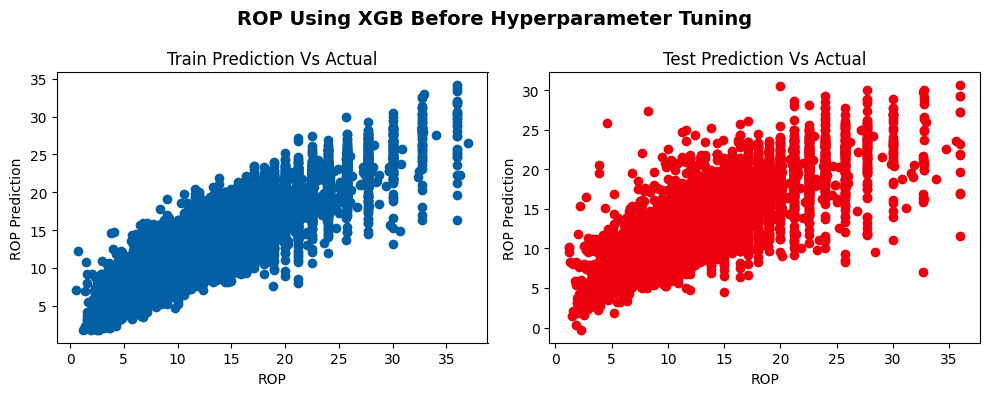

In [51]:
# Prediction & Test Graph of Predicted Vs Actual ROP on XGB Before Hyperparameter Tuning
def visualize_performance(Y_train_xgb, Y_pred_train_xgb, Y_test_xgb, Y_pred_test_xgb):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#FFFFFF')

    # Training set scatter plot
    axs[0].scatter(Y_train_xgb, Y_pred_train_xgb, color="#025FA4")
    axs[0].set_facecolor('#FFFFFF')
    axs[0].set_xlabel("ROP")
    axs[0].set_ylabel("ROP Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(Y_test_xgb, Y_pred_test_xgb, color="#EC000E")
    axs[1].set_facecolor('#FFFFFF')
    axs[1].set_xlabel("ROP")
    axs[1].set_ylabel("ROP Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.suptitle("ROP Using XGB Before Hyperparameter Tuning", fontweight = 'bold', fontsize = 14)
    plt.tight_layout()
    plt.show()

visualize_performance(Y_train_xgb, Y_pred_train_xgb, Y_test_xgb, Y_pred_test_xgb)

## **Hyperparameter Tuning**

---

In [52]:
# Set Parameter Hyperparameter Tuning Model XGB Regressor
parameters = {'max_depth': [3, 5, 6, 10, 15, 20],
              'learning_rate': [0.01, 0.1, 0.2, 0.3],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.4, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
              'n_estimators': [100, 500, 1000]}

# Set RandomizedSearchCV for Hyperparameter Tuning Model XGB Regressor
xgb_base = XGBRegressor(random_state=0)
xgb_random_search = RandomizedSearchCV(xgb_base, parameters, n_iter = 10, cv = 3, verbose = 2, random_state = 0,
                               n_jobs = -1, return_train_score = True)

# Fit The Model To The Training Data
xgb_random_search.fit(X_train_scaled_xgb, Y_train_xgb)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=0, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=0, return_train_score=True, verbose=2)

In [53]:
# Best Hyperparameter Tuning Model XGB Regressor
xgb_random_search.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 500,
 'max_depth': 10,
 'learning_rate': 0.01,
 'colsample_bytree': 0.4,
 'colsample_bylevel': 0.6}

In [54]:
# Set Best Hyperparameter Tuning Model XGB Regressor
best_random_xgb = xgb_random_search.best_estimator_
best_random_xgb.fit(X_train_scaled_mlp, Y_train_mlp)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.6, colsample_bynode=None, colsample_bytree=0.4,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, random_state=0, ...)

### **Train Modelling**

In [55]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_train_xgb = best_random_xgb.predict(X_train_scaled_xgb)

# Calculate The Metrics
r2_train = round(r2_score(Y_train_xgb, best_prediction_train_xgb),4)
mape_train = round(metrics.mean_absolute_percentage_error(Y_train_xgb, best_prediction_train_xgb),4)
mae_train = round(metrics.mean_absolute_error(Y_train_xgb, best_prediction_train_xgb),4)
rmse_train = round(sqrt(metrics.mean_squared_error(Y_train_xgb, best_prediction_train_xgb)),4)
mse_train = round(metrics.mean_squared_error(Y_train_xgb, best_prediction_train_xgb),4)

# Print The Metrics
print('Metrics Score Training After Hyperparameter Tuning')
print('R2\t', r2_train)
print('MAPE\t', mape_train)
print('MAE\t', mae_train)
print('RMSE\t', rmse_train)
print('MSE\t', mse_train)

Metrics Score Training After Hyperparameter Tuning
R2	 0.8014
MAPE	 0.1709
MAE	 1.8681
RMSE	 2.5628
MSE	 6.5681


### **Test Modelling**

In [56]:
# Make Predictions & Evaluate The Model's Performance
best_prediction_test_xgb = best_random_xgb.predict(X_test_scaled_xgb)

# Calculate The Metrics
r2_test = round(r2_score(Y_test_xgb, best_prediction_test_xgb),4)
mape_test = round(metrics.mean_absolute_percentage_error(Y_test_xgb, best_prediction_test_xgb),4)
mae_test = round(metrics.mean_absolute_error(Y_test_xgb, best_prediction_test_xgb),4)
rmse_test = round(sqrt(metrics.mean_squared_error(Y_test_xgb, best_prediction_test_xgb)),4)
mse_test = round(metrics.mean_squared_error(Y_test_xgb, best_prediction_test_xgb),4)

# Print The Metrics
print('Metrics Score Test After Hyperparameter Tuning')
print('R2\t', r2_test)
print('MAPE\t', mape_test)
print('MAE\t', mae_test)
print('RMSE\t', rmse_test)
print('MSE\t', mse_test)

Metrics Score Test After Hyperparameter Tuning
R2	 0.6828
MAPE	 0.2183
MAE	 2.3439
RMSE	 3.2794
MSE	 10.7542


In [57]:
# Run-time
all_features_time = []

for _ in range(5):
    start_time = time.time()
    best_random_xgb.fit(X_train_scaled_xgb, Y_train_xgb)
    predictions_nn = best_random_xgb.predict(X_test_scaled_xgb)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('Run-time:', round(all_features_time, 2), 'seconds.')

Run-time: 4.39 seconds.


### **Prediction & Test Graph of Predicted Vs Actual**

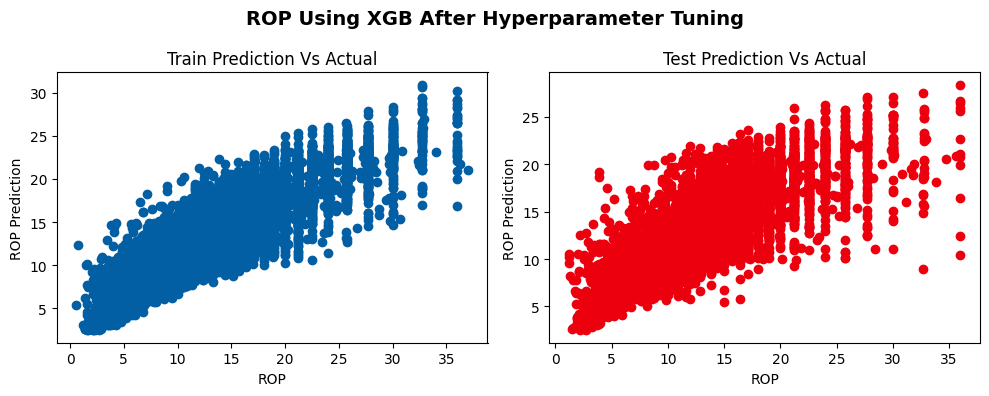

In [58]:
# Prediction & Test Graph of Predicted Vs Actual ROP on XGB After Hyperparameter Tuning
def visualize_performance(Y_train_xgb, best_prediction_train_xgb, Y_test_xgb, best_prediction_test_xgb):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='#FFFFFF')

    # Training set scatter plot
    axs[0].scatter(Y_train_xgb, best_prediction_train_xgb, color="#025FA4")
    axs[0].set_facecolor('#FFFFFF')
    axs[0].set_xlabel("ROP")
    axs[0].set_ylabel("ROP Prediction")
    axs[0].set_title("Train Prediction Vs Actual")

    # Test set scatter plot
    axs[1].scatter(Y_test_xgb, best_prediction_test_xgb, color="#EC000E")
    axs[1].set_facecolor('#FFFFFF')
    axs[1].set_xlabel("ROP")
    axs[1].set_ylabel("ROP Prediction")
    axs[1].set_title("Test Prediction Vs Actual")

    plt.suptitle("ROP Using XGB After Hyperparameter Tuning", fontweight = 'bold', fontsize = 14)
    plt.tight_layout()
    plt.show()

visualize_performance(Y_train_xgb, best_prediction_train_xgb, Y_test_xgb, best_prediction_test_xgb)

## **Learning Curve**

---



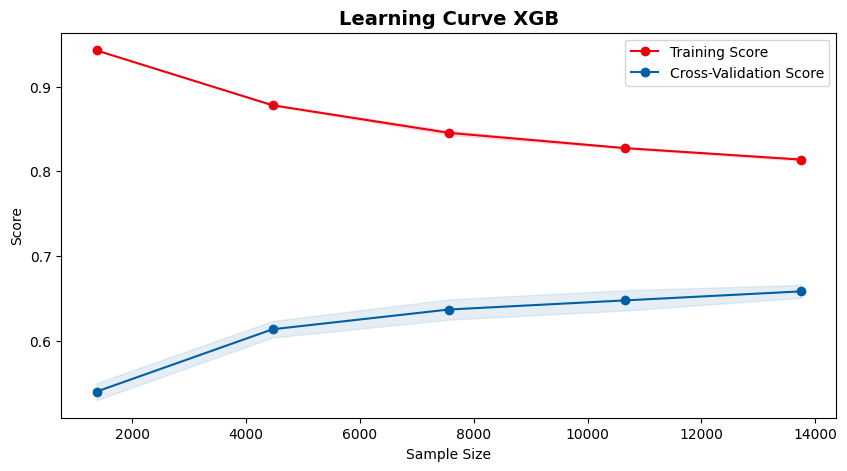

In [59]:
# Define the XGB Regressor Model
xgb_regressor = XGBRegressor(**xgb_random_search.best_params_)

# Define The Train Sizes
train_sizes = np.linspace(0.1, 1.0, 5)

# Generate The Learning Curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(xgb_regressor,
                                                                      X_train_scaled_xgb,
                                                                      Y_train_xgb,
                                                                      cv = 5,
                                                                      train_sizes = train_sizes,
                                                                      return_times = True)

# Calculate The Mean & Standard Deviation Of The Train And Test Scores
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

# Calculate The Mean And Standard Deviation Of The Fit Times
fit_times_mean = np.mean(fit_times, axis = 1)
fit_times_std = np.std(fit_times, axis = 1)

# Create The Plot
fig, axes = plt.subplots(1, 1, figsize = (10, 5))

# Plot The Training Scores
axes.plot(train_sizes, train_scores_mean, "o-", color = "#EC000E", label = "Training Score")
axes.fill_between(train_sizes,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha = 0.1,
                  color = "#EC000E")

# Plot The Cross-validation Scores
axes.plot(train_sizes, test_scores_mean, "o-", color = "#025FA4", label = "Cross-Validation Score")
axes.fill_between(train_sizes,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha = 0.1,
                  color = "#025FA4")

# Add The Legend
axes.legend()
axes.set_xlabel('Sample Size')
axes.set_ylabel('Score')
axes.set_title("Learning Curve XGB", fontweight = 'bold', fontsize = 14)

# Show The Plot
plt.show()